# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('FuelEconomy.csv')


In [4]:
data.head(20)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571
6,271.441608,17.163583
7,294.425916,17.274218
8,126.211008,28.718210
9,163.350335,28.289516


In [5]:
data.tail(5)

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
data.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


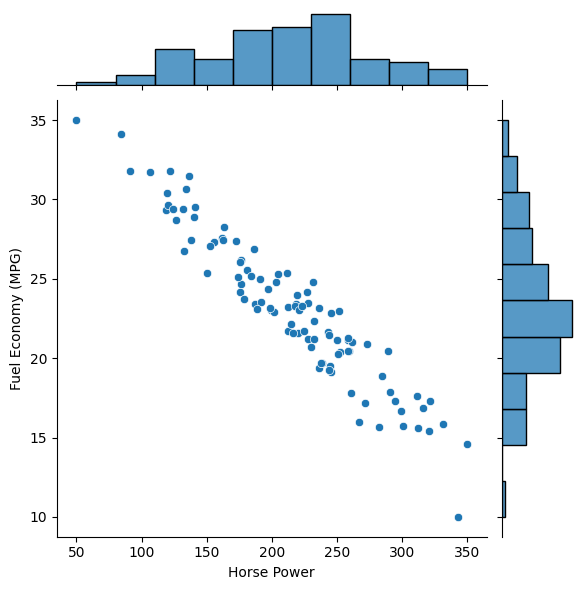

In [8]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data=data)

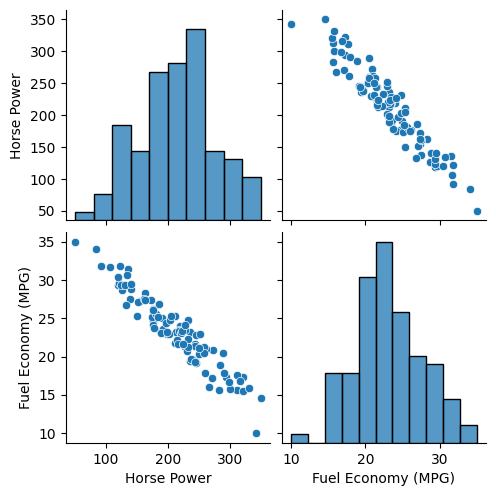

In [9]:
sns.pairplot(data=data)

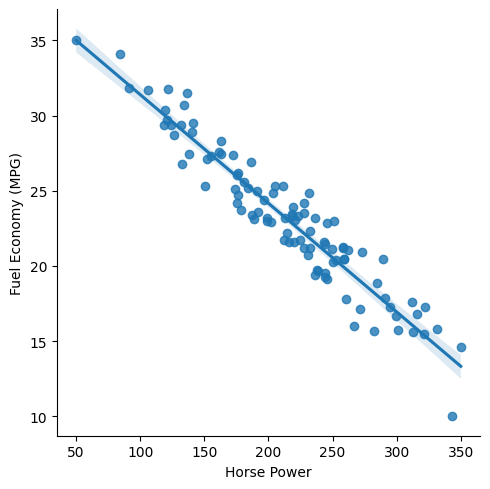

In [10]:
sns.lmplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data=data)

In [11]:
x = data[['Horse Power']]


In [12]:
x

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [13]:
y = data['Fuel Economy (MPG)']
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=True)

In [16]:
x_train

,Horse Power
2,219.262465
73,261.852110
97,243.831211
62,220.720946
19,136.306453
...,...
75,220.098586
9,163.350335
72,175.348913
12,155.415368


In [17]:
x_test

,Horse Power
80,198.958315
84,224.342078
33,282.604246
81,249.883996
93,131.542116
17,191.098963
36,227.873503
82,216.281206
69,315.817498
65,181.067934


 TRAIN THE MODEL

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)

In [24]:
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
print('Linear Coefficient (m)', regressor.coef_)
print('Linear Coefficient (b)', regressor.intercept_)

Linear Coefficient (m) [-0.07339131]
Linear Coefficient (b) 38.77876665049424


 TEST THE MODEL 

In [26]:
x_test

,Horse Power
80,198.958315
84,224.342078
33,282.604246
81,249.883996
93,131.542116
17,191.098963
36,227.873503
82,216.281206
69,315.817498
65,181.067934


In [27]:
ypredict = regressor.predict(x_test)
ypredict

array([24.17695592, 22.31400835, 18.0380717 , 20.4394536 , 29.12471885,
       24.75376402, 22.05483246, 22.90560632, 15.60050774, 25.48995437,
       22.09104218, 20.24361703, 20.32639361, 20.73768578, 17.43017493,
       15.84455503, 25.86342177, 22.06973368, 19.79538019, 15.15845328])

In [28]:
y_test

80    23.172223
84    21.701202
33    15.676316
81    21.139429
93    29.397567
17    24.989630
36    23.488811
82    21.595626
69    16.831188
65    25.575084
92    24.181109
39    20.407571
56    22.965773
52    22.849711
51    17.873266
32    15.618956
31    26.188478
44    21.205987
78    20.470676
10    17.300628
Name: Fuel Economy (MPG), dtype: float64

Text(0.5, 1.0, 'Fuel Consumption prediction')

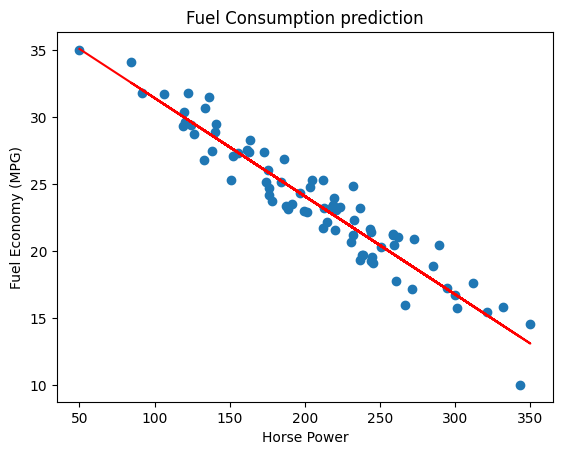

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'red')

plt.ylabel('Fuel Economy (MPG)' )
plt.xlabel('Horse Power')
plt.title('Fuel Consumption prediction')

In [39]:
HP = [[55]]
# now we can predict the value of MPG with our model
MPG = regressor.predict(HP)
MPG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.74224478])